In [10]:
# Q1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

df = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")
print(df.head())
print(df.info()) 



                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

In [12]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [14]:

print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [35]:
# Q2

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    mean = df[col].mean()  
    std = df[col].std() 

    print(f"Column: {col}")
    print(f"Mean: {mean}, Standard Deviation: {std}")

    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    



Column: total_sqft
Mean: 1555.3027829545454, Standard Deviation: 1237.3234454015123
Lower Bound: -2156.6675532499917, Upper Bound: 5267.273119159083
Column: bath
Mean: 2.6911363636363634, Standard Deviation: 1.3389150868179767
Lower Bound: -1.3256088968175663, Upper Bound: 6.707881624090293
Column: price
Mean: 112.27617765151514, Standard Deviation: 149.17599517809657
Lower Bound: -335.2518078827746, Upper Bound: 559.8041631858049
Column: bhk
Mean: 2.8008333333333333, Standard Deviation: 1.2928434212725608
Lower Bound: -1.0776969304843491, Upper Bound: 6.679363597151015
Column: price_per_sqft
Mean: 7920.336742424242, Standard Deviation: 106727.16032810845
Lower Bound: -312261.1442419011, Upper Bound: 328101.8177267496


In [37]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

lower_percentile = 0.01  
upper_percentile = 0.99  

for col in numeric_cols:
    
    lower_bound = df[col].quantile(lower_percentile)
    upper_bound = df[col].quantile(upper_percentile)

    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: total_sqft
Lower Bound: 500.0, Upper Bound: 5000.0
Column: bath
Lower Bound: 1.0, Upper Bound: 8.0
Column: price
Lower Bound: 19.0, Upper Bound: 660.0
Column: bhk
Lower Bound: 1.0, Upper Bound: 8.0
Column: price_per_sqft
Lower Bound: 2549.0, Upper Bound: 23674.45000000001


In [39]:

for col in numeric_cols:
   
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    
    IQR = Q3 - Q1
    print(f"Column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Column: total_sqft
Q1: 1100.0, Q3: 1672.0, IQR: 572.0
Lower Bound: 242.0, Upper Bound: 2530.0
Column: bath
Q1: 2.0, Q3: 3.0, IQR: 1.0
Lower Bound: 0.5, Upper Bound: 4.5
Column: price
Q1: 50.0, Q3: 120.0, IQR: 70.0
Lower Bound: -55.0, Upper Bound: 225.0
Column: bhk
Q1: 2.0, Q3: 3.0, IQR: 1.0
Lower Bound: 0.5, Upper Bound: 4.5
Column: price_per_sqft
Q1: 4267.0, Q3: 7317.0, IQR: 3050.0
Lower Bound: -308.0, Upper Bound: 11892.0


In [63]:
#  Z Score method
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    print(f"Processing Column: {col}")
    
   
    df[col + '_zscore'] = zscore(df[col]) 
    print(f"Z-scores for {col}:\n{df[col + '_zscore']}")
    
    
    df[col] = np.where((df[col + '_zscore'] > 3) | (df[col + '_zscore'] < -3), np.nan, df[col])
    
    
    print(f"Outliers in {col} replaced with NaN.")



Processing Column: total_sqft
Z-scores for total_sqft:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: total_sqft_zscore, Length: 13200, dtype: float64
Outliers in total_sqft replaced with NaN.
Processing Column: bath
Z-scores for bath:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: bath_zscore, Length: 13200, dtype: float64
Outliers in bath replaced with NaN.
Processing Column: price
Z-scores for price:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: price_zscore, Length: 13200, dtype: float64
Outliers in price replaced with NaN.
Processing Column: bhk
Z-scores for bhk:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: bhk_zscore, L

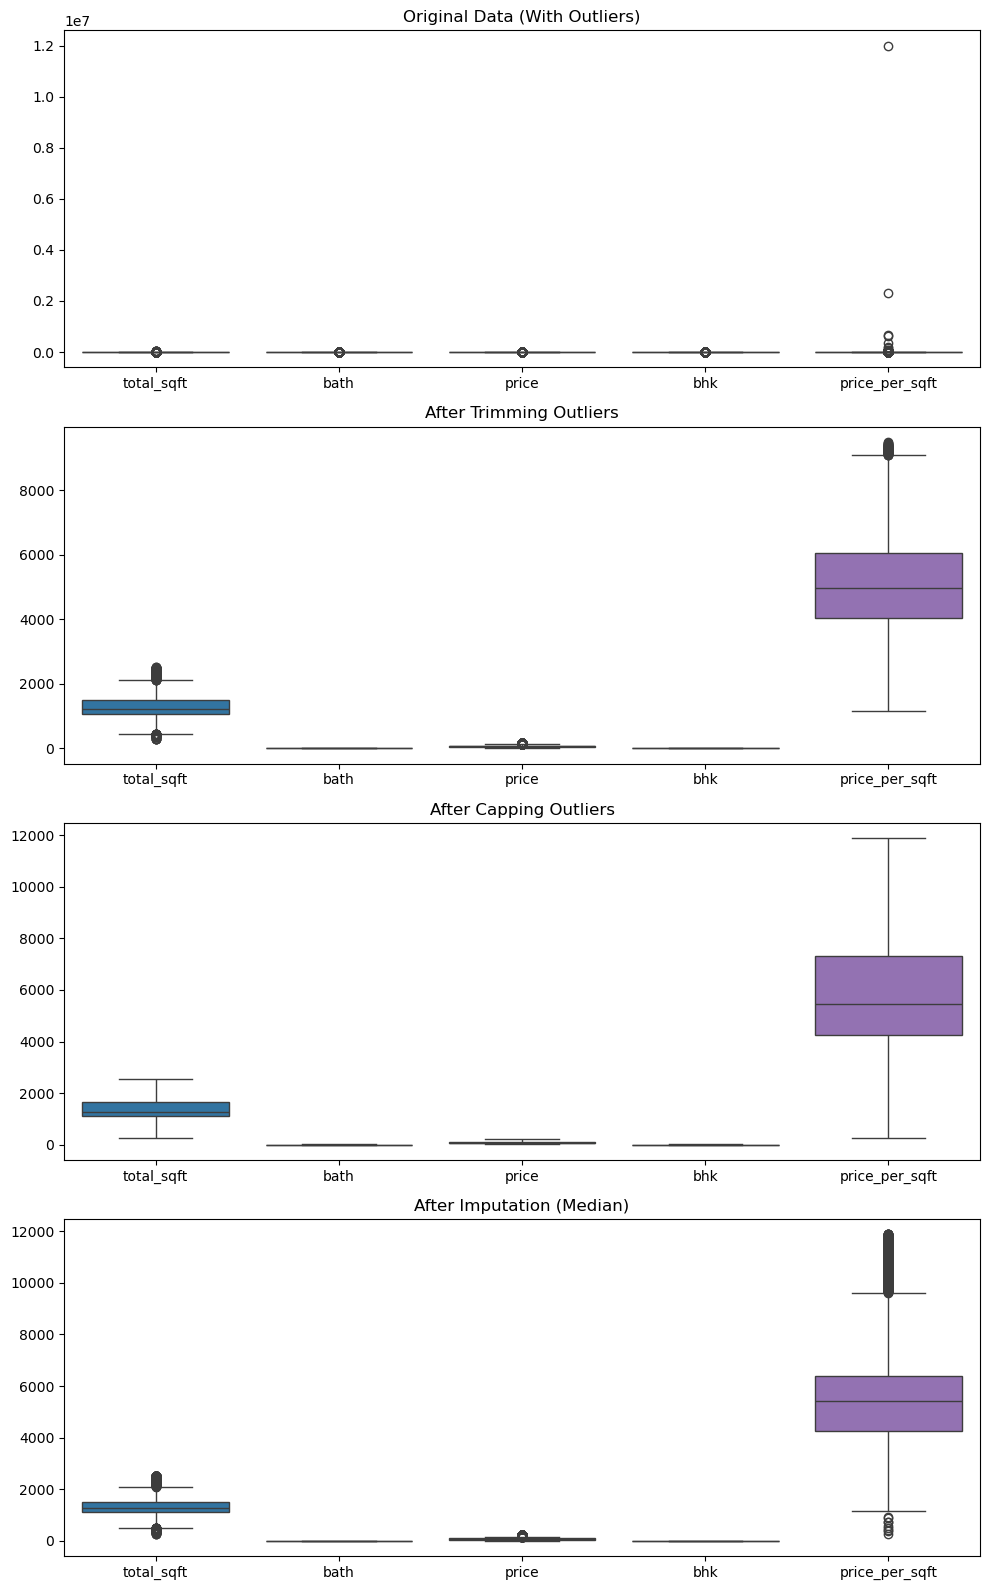

In [67]:
#Q3
df_original = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")

df_trimming = df_original.copy()
df_capping = df_original.copy()
df_imputation = df_original.copy()


numeric_cols = df_original.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    Q1 = df_trimming[col].quantile(0.25)
    Q3 = df_trimming[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_trimming = df_trimming[(df_trimming[col] >= lower_bound) & (df_trimming[col] <= upper_bound)]


for col in numeric_cols:
    Q1 = df_capping[col].quantile(0.25)
    Q3 = df_capping[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capping[col] = np.where(df_capping[col] < lower_bound, lower_bound, df_capping[col])
    df_capping[col] = np.where(df_capping[col] > upper_bound, upper_bound, df_capping[col])


for col in numeric_cols:
    Q1 = df_imputation[col].quantile(0.25)
    Q3 = df_imputation[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_imputation[col] = np.where((df_imputation[col] < lower_bound) | (df_imputation[col] > upper_bound), 
                                  df_imputation[col].median(), 
                                  df_imputation[col])


fig, axes = plt.subplots(4, 1, figsize=(10, 16))
sns.boxplot(data=df_original[numeric_cols], ax=axes[0])
axes[0].set_title("Original Data (With Outliers)")

sns.boxplot(data=df_trimming[numeric_cols], ax=axes[1])
axes[1].set_title("After Trimming Outliers")

sns.boxplot(data=df_capping[numeric_cols], ax=axes[2])
axes[2].set_title("After Capping Outliers")

sns.boxplot(data=df_imputation[numeric_cols], ax=axes[3])
axes[3].set_title("After Imputation (Median)")

plt.tight_layout()
plt.show()                          

Before Transformation:
Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


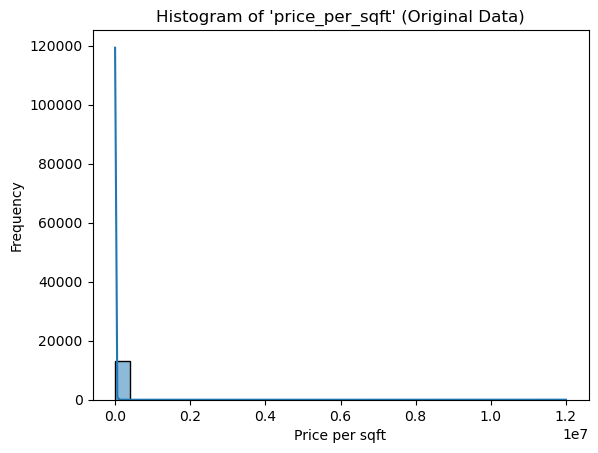


After Log Transformation:
Skewness: 1.4003259019533636
Kurtosis: 9.203000543610957


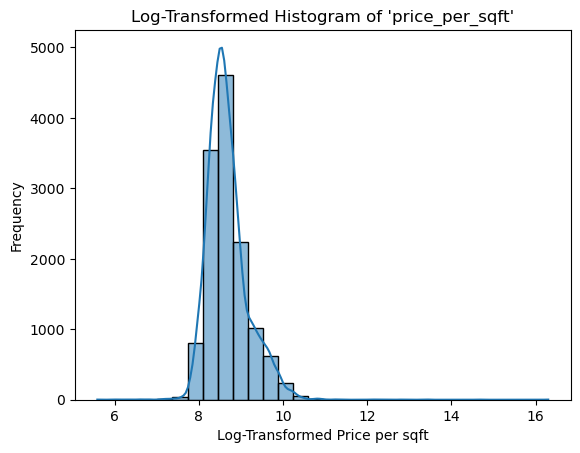


After Square Root Transformation:
Skewness: 50.92024120161347
Kurtosis: 4032.774412540433


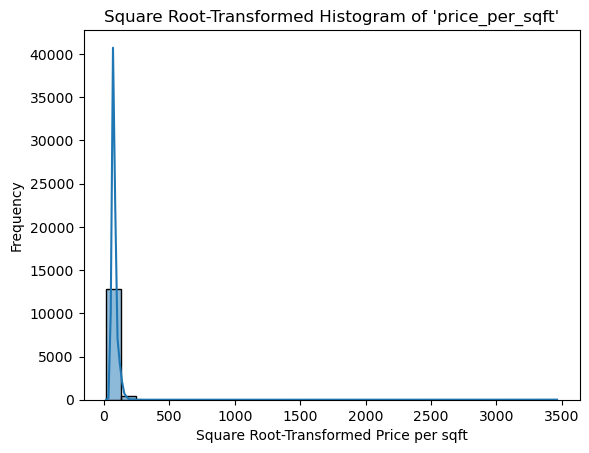

In [71]:
#Q4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


df = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")


if 'price_per_sqft' not in df.columns:
    print("Column 'price_per_sqft' not found in the dataset!")
else:
    
    print("Before Transformation:")
    skew_original = skew(df['price_per_sqft'], nan_policy='omit')
    kurtosis_original = kurtosis(df['price_per_sqft'], nan_policy='omit')
    print(f"Skewness: {skew_original}")
    print(f"Kurtosis: {kurtosis_original}")
    
    sns.histplot(df['price_per_sqft'], kde=True, bins=30)
    plt.title("Histogram of 'price_per_sqft' (Original Data)")
    plt.xlabel("Price per sqft")
    plt.ylabel("Frequency")
    plt.show()

   
    df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])  # log(1 + x) to handle zero values
    print("\nAfter Log Transformation:")
    skew_log = skew(df['log_price_per_sqft'], nan_policy='omit')
    kurtosis_log = kurtosis(df['log_price_per_sqft'], nan_policy='omit')
    print(f"Skewness: {skew_log}")
    print(f"Kurtosis: {kurtosis_log}")
    
    sns.histplot(df['log_price_per_sqft'], kde=True, bins=30)
    plt.title("Log-Transformed Histogram of 'price_per_sqft'")
    plt.xlabel("Log-Transformed Price per sqft")
    plt.ylabel("Frequency")
    plt.show()

    
    df['sqrt_price_per_sqft'] = np.sqrt(df['price_per_sqft'])
    print("\nAfter Square Root Transformation:")
    skew_sqrt = skew(df['sqrt_price_per_sqft'], nan_policy='omit')
    kurtosis_sqrt = kurtosis(df['sqrt_price_per_sqft'], nan_policy='omit')
    print(f"Skewness: {skew_sqrt}")
    print(f"Kurtosis: {kurtosis_sqrt}")
    
    sns.histplot(df['sqrt_price_per_sqft'], kde=True, bins=30)
    plt.title("Square Root-Transformed Histogram of 'price_per_sqft'")
    plt.xlabel("Square Root-Transformed Price per sqft")
    plt.ylabel("Frequency")
    plt.show()




Correlation Matrix:
                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.392743  0.574330  0.346013       -0.008267
bath              0.392743  1.000000  0.455998  0.897951        0.030883
price             0.574330  0.455998  1.000000  0.396883        0.028387
bhk               0.346013  0.897951  0.396883  1.000000        0.030955
price_per_sqft   -0.008267  0.030883  0.028387  0.030955        1.000000


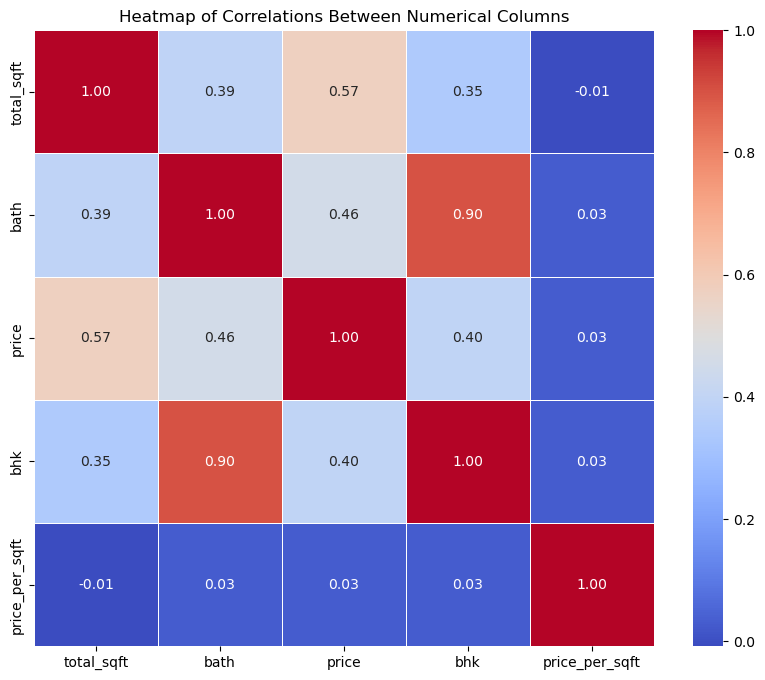

In [73]:
#Q5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")

numerical_cols = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_cols.corr()


print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlations Between Numerical Columns")
plt.show()


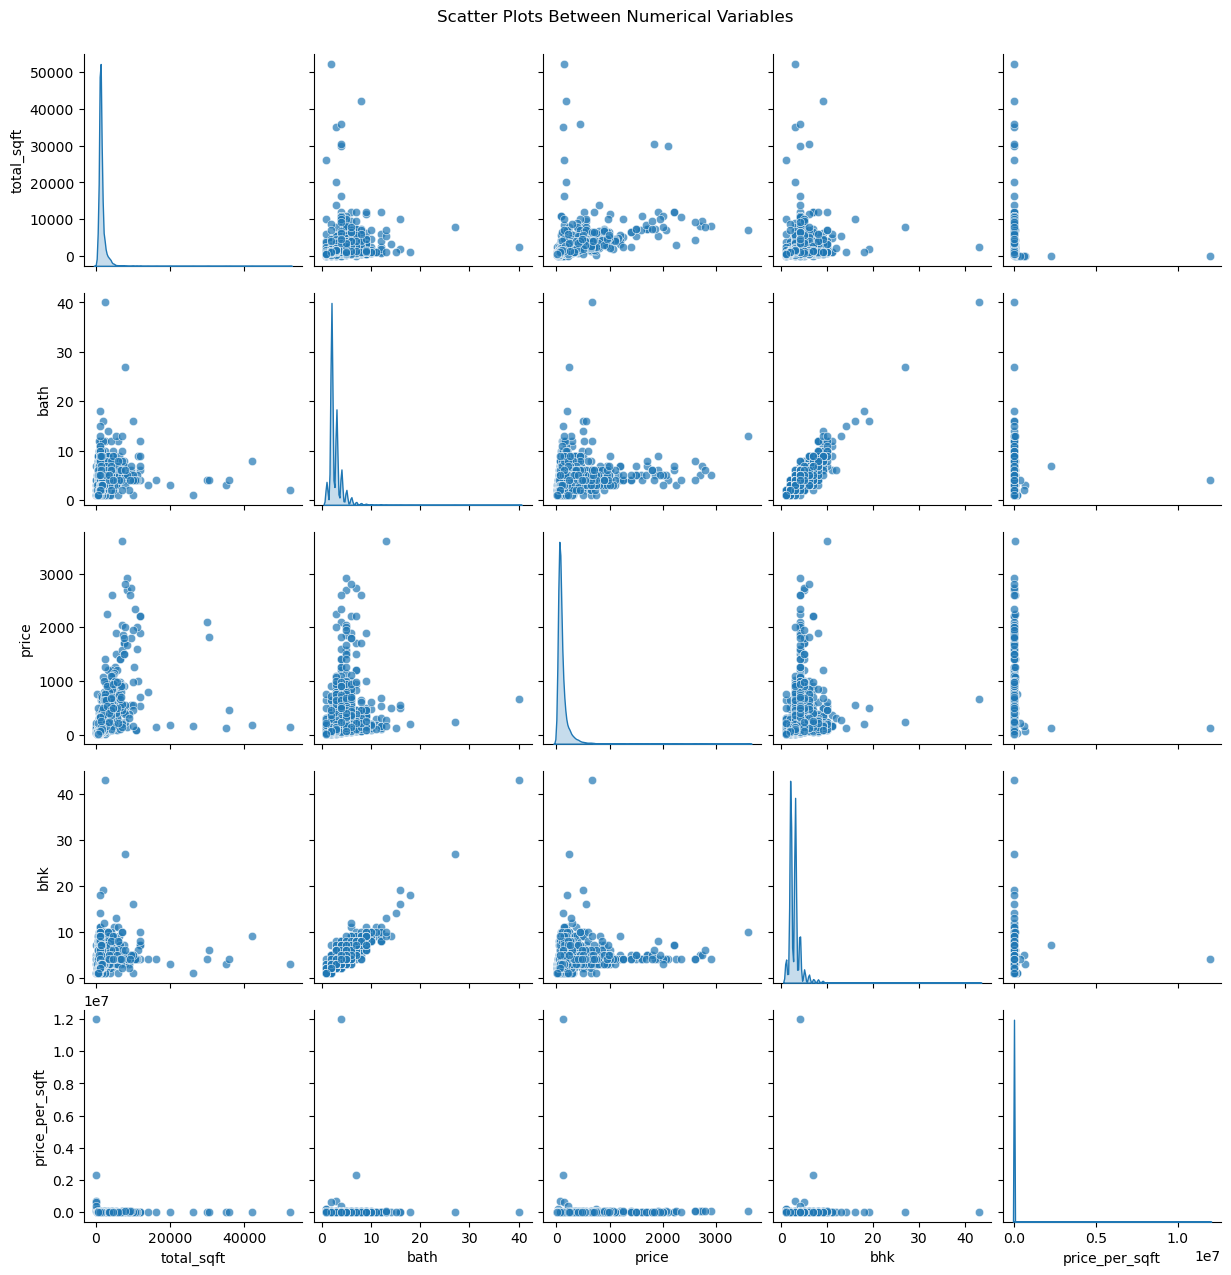

In [76]:
#Q6
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\Sharon\Downloads\house_price.csv")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numeric_cols], diag_kind='kde', markers="o", plot_kws={'alpha':0.7})
plt.suptitle("Scatter Plots Between Numerical Variables", y=1.02) 
plt.show()
